In [1]:
#загружаю библиотеки
!pip install phik -q
!pip install --upgrade scikit-learn -q

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns
import scipy.stats as st
import random

from matplotlib import pyplot as plt
from phik import resources, report
from tqdm.notebook import tqdm
from tqdm import tqdm_notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель исследования:** 

Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.

**Ход исследования:**

1. Загрузка и подготовка данных: загрузка и изучение общей информации из датасетов, обработка дубликатов и изменение типов данных, исследовательский анализ данных
2. Обучение моделей, выбор лучшей, проверка качества
3. Подготовка к рассчету прибыли
4. Расчет прибыли и рисков

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций

## Загрузка и подготовка данных

### Загрузка данных

In [2]:
df_geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv') # данные геологоразведки первого региона
df_geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv') # данные геологоразведки второго региона
df_geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv') #данные геологоразведки третьего региона

In [3]:
def open_df(df, df_name="DataFrame", show_info=True, show_head=True, show_describe=True):
    print(f'Анализ {df_name}:\n')
    
    if show_info:
        print(f'Общая информация о {df_name}:')
        display(df.info())

    if show_head:
        print(f'\nПервые строки {df_name}:')
        display(df.head())

    if show_describe:
        print(f'\nСтатистики для {df_name}:')
        display(df.describe())

In [4]:
open_df(df_geo_data_0, df_name="df_geo_data_0")

Анализ df_geo_data_0:

Общая информация о df_geo_data_0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Первые строки df_geo_data_0:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Статистики для df_geo_data_0:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


В данных df_geo_data_0 10000 строк. Пропуски отсутствуют. Типы столбцов указаны верно. Названия столбцов корректны.

In [5]:
open_df(df_geo_data_1, df_name="df_geo_data_1")

Анализ df_geo_data_1:

Общая информация о df_geo_data_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Первые строки df_geo_data_1:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Статистики для df_geo_data_1:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


В данных df_geo_data_1 10000 строк. Пропуски отсутствуют. Типы столбцов указаны верно. Названия столбцов корректны.

In [6]:
open_df(df_geo_data_2, df_name="df_geo_data_2")

Анализ df_geo_data_2:

Общая информация о df_geo_data_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Первые строки df_geo_data_2:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Статистики для df_geo_data_2:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


В данных df_geo_data_2 10000 строк. Пропуски отсутствуют. Типы столбцов указаны верно. Названия столбцов корректны.

**Выводы:**

Во всех трех датафреймах по 10000 строк. Пропуски отсутствуют. Названия столбцов корректны

### Предобработка данных

**Удаление столбца id**

In [7]:
df_geo_data_0 = df_geo_data_0.drop(['id'], axis=1)
df_geo_data_1 = df_geo_data_1.drop(['id'], axis=1)
df_geo_data_2 = df_geo_data_2.drop(['id'], axis=1)
display(df_geo_data_0.head())
display(df_geo_data_1.head())
display(df_geo_data_2.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


**Поиск дубликатов**

In [8]:
#исследую данные на наличие явных дубликатов
print('Количество явных дубликатов в "df_geo_data_0" = ', df_geo_data_0.duplicated().sum())
print('Количество явных дубликатов в "df_geo_data_1" = ', df_geo_data_1.duplicated().sum())
print('Количество явных дубликатов в "df_geo_data_2" = ', df_geo_data_2.duplicated().sum())

Количество явных дубликатов в "df_geo_data_0" =  0
Количество явных дубликатов в "df_geo_data_1" =  0
Количество явных дубликатов в "df_geo_data_2" =  0


Явные дубликаты отсутствуют

Проверяю на неявные дубликаты

In [9]:
display(df_geo_data_0[df_geo_data_0.duplicated(subset=['f0', 'f1', 'f2'])])
display(df_geo_data_1[df_geo_data_1.duplicated(subset=['f0', 'f1', 'f2'])])
display(df_geo_data_2[df_geo_data_2.duplicated(subset=['f0', 'f1', 'f2'])])

,f0,f1,f2,product


,f0,f1,f2,product


,f0,f1,f2,product


Неявные дубликаты тоже отсутствуют

**Вывод**

В ходе предобработки данных в датафреймах удален столбец с id

### Исследовательский анализ данных

In [10]:
def plot_numeric_features(df):
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[column])
        plt.title(f'Ящик с усами {column}')
        plt.ylabel(column)
        plt.grid(axis='y', alpha=0.75)

        plt.figure(figsize=(8, 4))
        plt.hist(df[column], bins=10, alpha=0.5, color='blue')
        plt.title(f'Гистограмма {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(axis='y', alpha=0.75)
                
                
        plt.tight_layout()  # Регулировка отступов между подграфиками
        plt.show()

In [11]:
interval_columns = [  'f0', 'f1', 'f2', 'product']
def phik_matrix(df):
    # вычисление матрицы корреляции с методом Phik
    phik_matrix_result = df.phik_matrix(interval_cols=interval_columns)

    # визуализация
    plt.figure(figsize=(12, 8))
    sns.heatmap(phik_matrix_result, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
    plt.title('Корреляционная матрица Phik')
    plt.show()

In [12]:
def exp_analyses(df):
    display(df.describe())
    plot_numeric_features(df)
    phik_matrix(df)

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


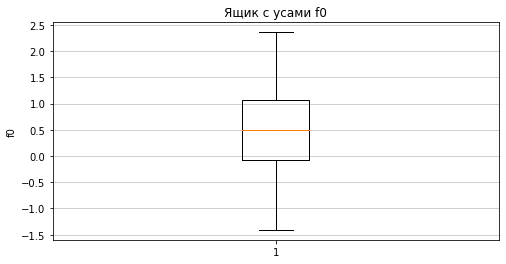

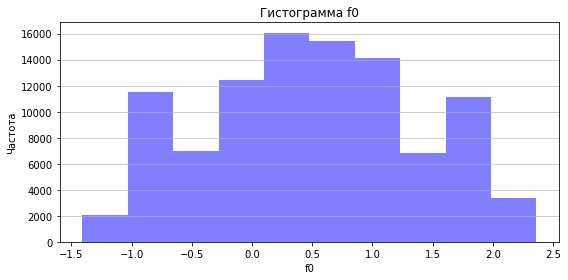

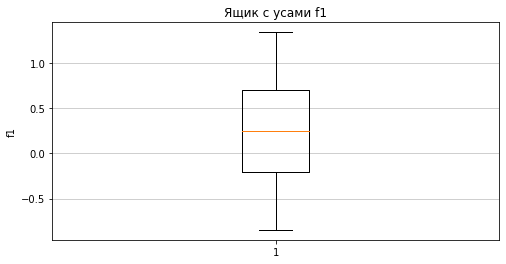

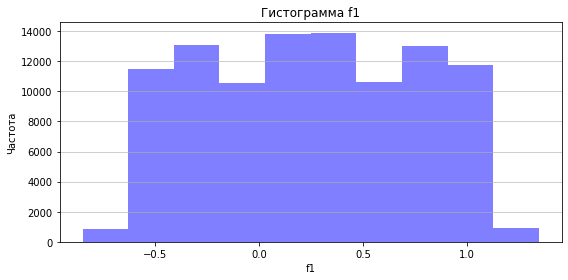

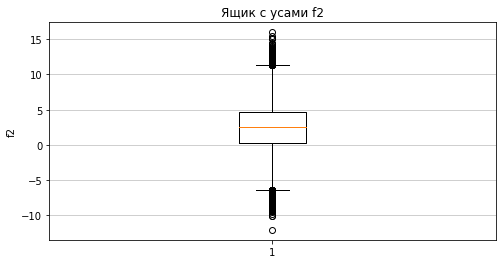

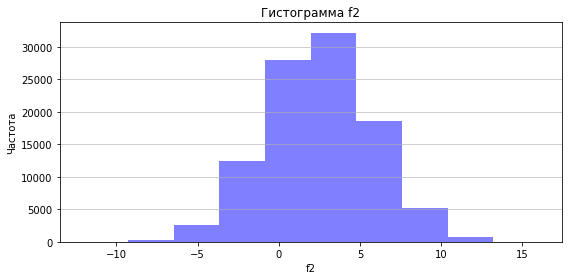

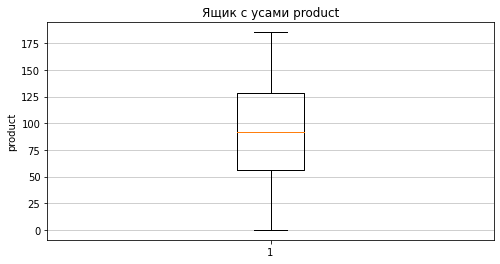

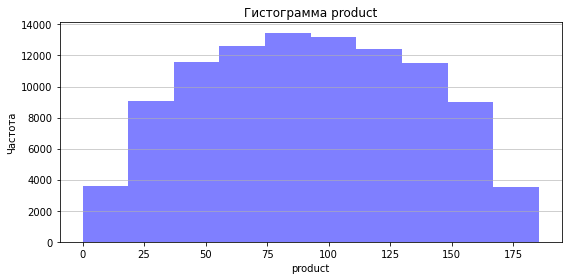

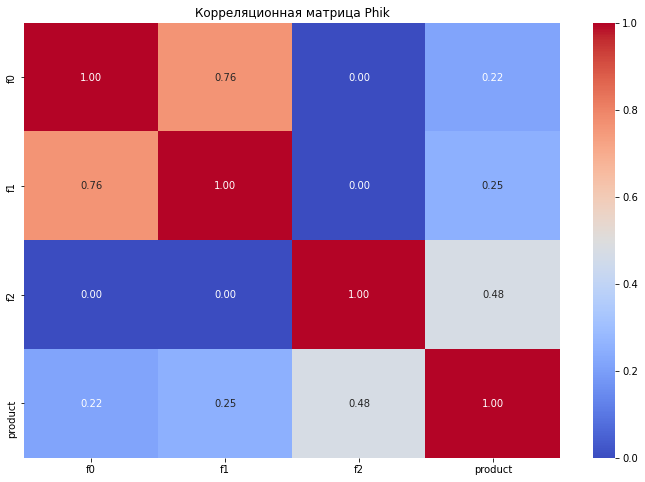

In [13]:
exp_analyses(df_geo_data_0)

Распределение всех признаков в df_geo_data_0 нормальное. У признака f2 имеется много выбросов. Сильных корелляций между признаками не выявлено

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


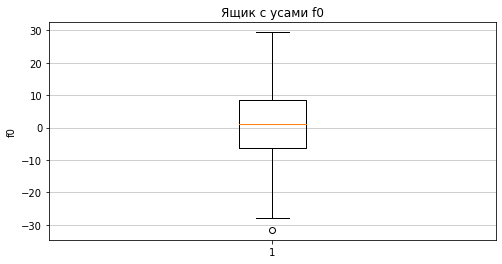

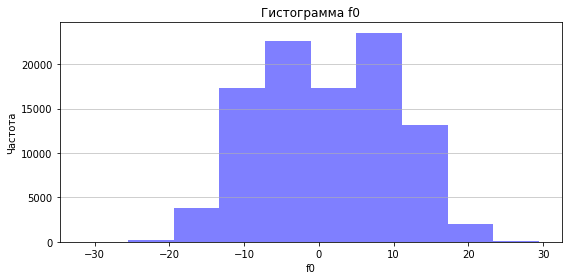

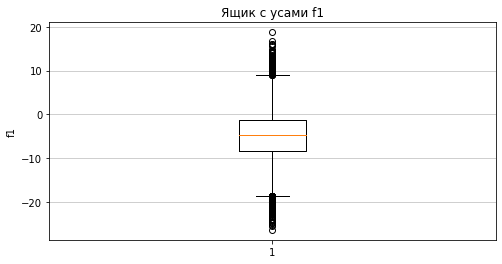

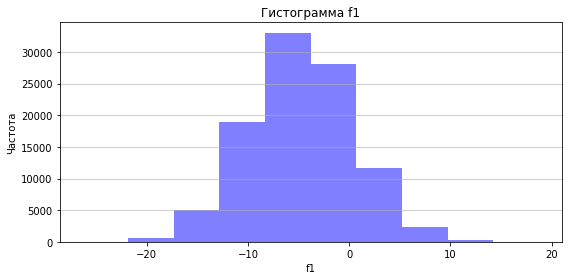

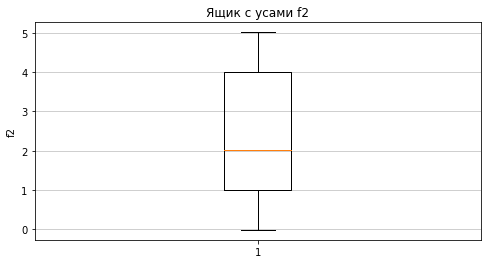

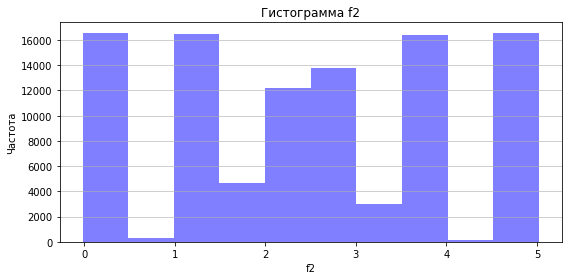

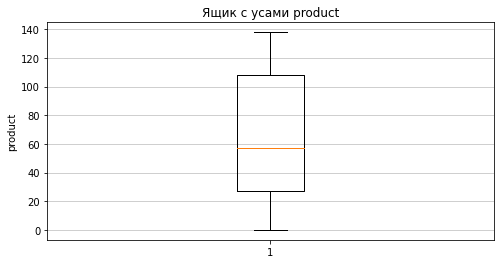

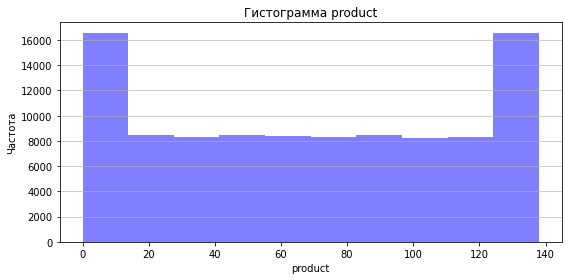

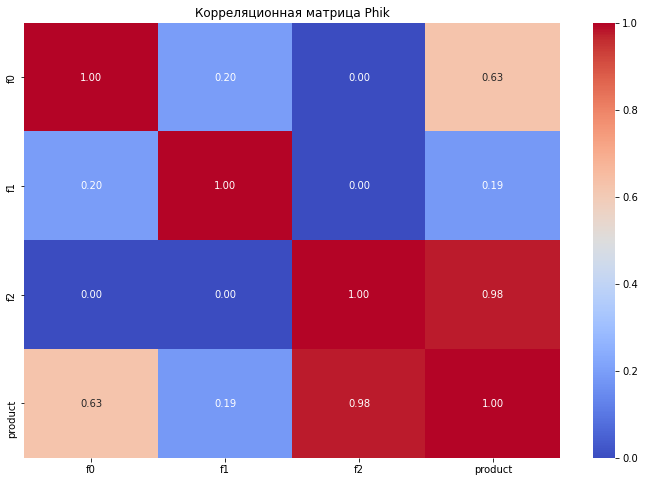

In [14]:
exp_analyses(df_geo_data_1)

В df_geo_data_1 признаки f0 и f1 распределены нормально. В f1 много выбросов. В столбцах f2 и product данные распределены странно. В f2 они группируются вокруг целых значений. А в product они распределены не нормально наибольшее количество значений в области минимума и максимума. Сильно кореллируют признаки f2 и prodict

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


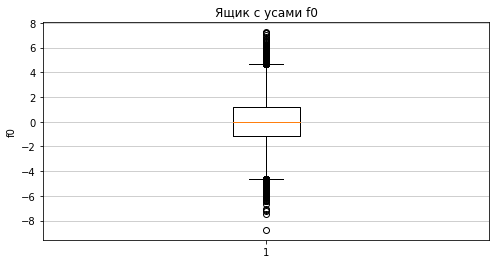

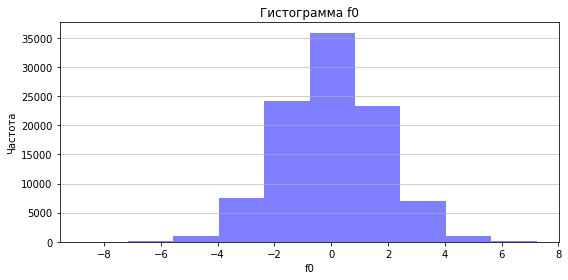

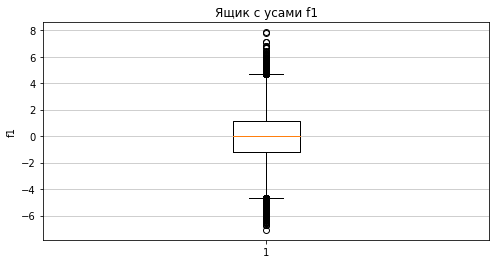

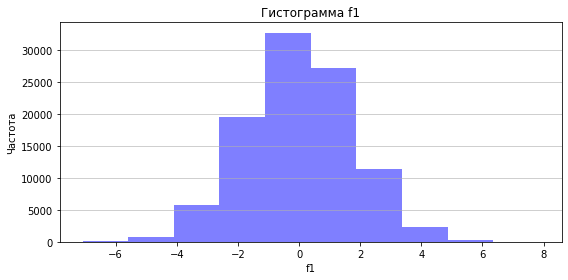

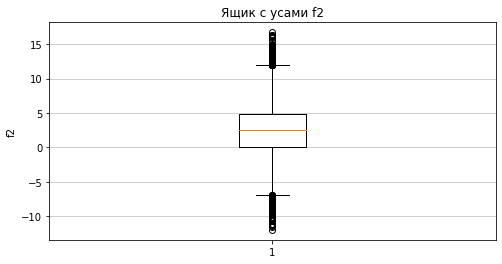

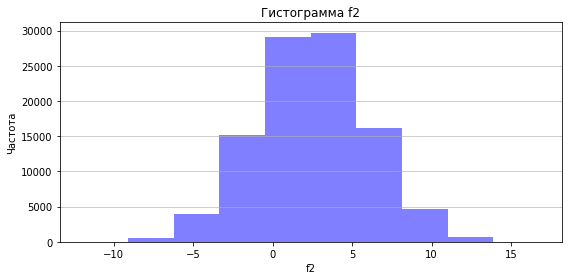

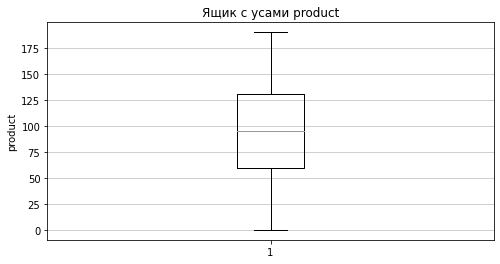

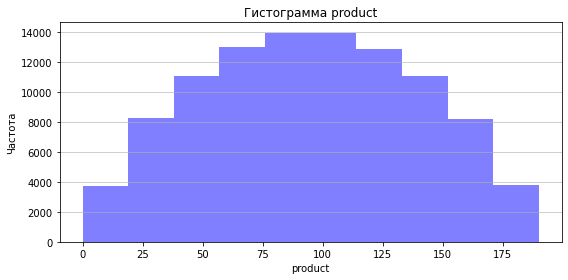

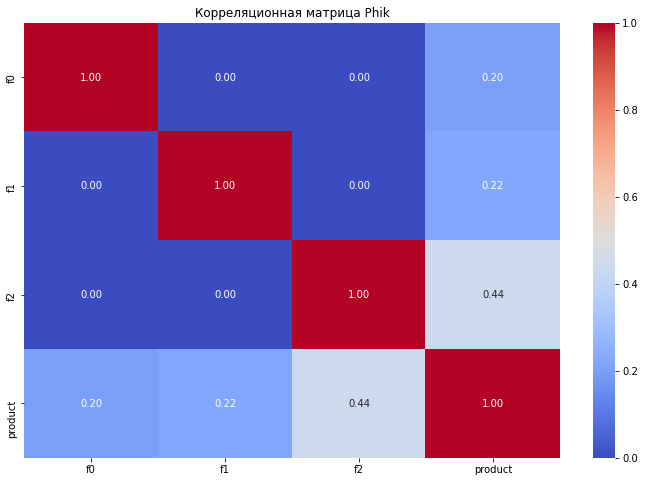

In [15]:
exp_analyses(df_geo_data_2)

В df_geo_data_2 признаки распределены нормально. В f0, f1 и f2 много выбросов. Сильных корелляций между признаками не обнаружено

**Выводы**

Распределение скважин в первом и третьем регионах стремится к нормальному, тогда как во втором регионе наблюдается аномальное распределение: значения варьируются от 0 до 5 баррелей с равномерными интервалами в 15-20 и составляют 100000 единиц данных. Также было обнаружено, что во втором регионе существует значительная корреляция между характеристикой f2 и объемом добычи.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно.
</div>

## Обучение и проверка модели

In [16]:
names = ['df_geo_data_0', 'df_geo_data_1', 'df_geo_data_2']
data = [df_geo_data_0, df_geo_data_1, df_geo_data_2]

# Создадим словарь для хранения фактических и предсказанных значений для валидирующего набора данных
targets = {}

for name, dataset in zip(names, data):
    target = dataset['product']
    features = dataset.drop('product', axis=1)
    
    # Разделим данные на обучающие и валидационные наборы
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=42
    )
    
    # Создаем последовательность обработки и модели линейной регрессии
    model = make_pipeline(StandardScaler(), LinearRegression())
    
    # Обучаем модель
    model.fit(features_train, target_train)
    
    # Записываем фактические и предсказанные данные в словарь
    predictions = model.predict(features_valid)
    targets[name] = (target_valid, pd.Series(predictions, index=target_valid.index, name='product_predicted'))
    
    # Печатаем на экране средний запас фактического и предсказанного сырья, а также RMSE
    print(f'\nДля {name} региона:')
    print(f'Средний запас фактического сырья = {targets[name][0].mean():.2f} тыс. баррелей')
    print(f'Средний запас предсказанного сырья = {targets[name][1].mean():.2f} тыс. баррелей')
    print(f'Разница = {(1 - targets[name][0].mean() / targets[name][1].mean()):.2%}')
    print(f'RMSE модели = {mean_squared_error(target_valid, targets[name][1]) ** 0.5:.2f}')


Для df_geo_data_0 региона:
Средний запас фактического сырья = 92.33 тыс. баррелей
Средний запас предсказанного сырья = 92.40 тыс. баррелей
Разница = 0.08%
RMSE модели = 37.76

Для df_geo_data_1 региона:
Средний запас фактического сырья = 68.73 тыс. баррелей
Средний запас предсказанного сырья = 68.71 тыс. баррелей
Разница = -0.02%
RMSE модели = 0.89

Для df_geo_data_2 региона:
Средний запас фактического сырья = 95.15 тыс. баррелей
Средний запас предсказанного сырья = 94.77 тыс. баррелей
Разница = -0.40%
RMSE модели = 40.15


**Вывод** 

Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.89).  В то же время, для датасетов df_geo_data_0 и df_geo_data_2 RMSE значительно выше и составляет 37.76 и 40.15 соответственно. Эти показатели указывают на значительный разброс в целевых значениях, что означает, что предсказанные данные для этих наборов не в полной мере отражают реальные запасы сырья с высокой степенью точности. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь циклы. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраняю в отдельных переменных.

In [17]:
POINTS = 500 # количество скважин, которое исследуют при разведке региона
BEST_POINTS = 200 # количество лучших скважин, которые нужно выбрать для разработки в каждом регионе с помощью машинного обучения
BUDGET = 10000000000 # бюджет (расходы) на разработку скважин в регионе (тыс. рублей), заложенный на 200 скважин
BARREL_PRICE = 450000 # доход с каждой единицы продукта (тыс. рублей на 1 тыс. баррелей)
THRESHOLD = 0.025

In [18]:
break_even = BUDGET / (BARREL_PRICE * BEST_POINTS)
print(f'Достаточный объём сырья для безубыточной разработки = {break_even:.2f} тыс. баррелей.')

for name, data in zip(names, data):
    print()
    print(f'Средний запас в {name} регионе = {data["product"].mean():.2f} тыс. баррелей.')
    print(f'Процент скважин с объёмом больше чем порог = {len(data.query("product > @break_even")) / len(data):.2%}')
    print(f'Количество скважин в объёмом больше чем порог = {len(data.query("product > @break_even"))}')

Достаточный объём сырья для безубыточной разработки = 111.11 тыс. баррелей.

Средний запас в df_geo_data_0 регионе = 92.50 тыс. баррелей.
Процент скважин с объёмом больше чем порог = 36.58%
Количество скважин в объёмом больше чем порог = 36583

Средний запас в df_geo_data_1 регионе = 68.83 тыс. баррелей.
Процент скважин с объёмом больше чем порог = 16.54%
Количество скважин в объёмом больше чем порог = 16537

Средний запас в df_geo_data_2 регионе = 95.00 тыс. баррелей.
Процент скважин с объёмом больше чем порог = 38.18%
Количество скважин в объёмом больше чем порог = 38178


**Вывод:**

Для того чтобы вернуть вложенные средства в разработку, скважины, отобранные с помощью модели, должны обладать запасами, значительно превышающими установленную пороговую величину. Это обусловлено тем, что в текущих условиях доля скважин с запасами, превышающими этот порог, составляет всего лишь 40% во всех регионах. Средняя точка безубыточности составляет приблизительно 111.11 тысяч баррелей на скважину, в то время как средние запасы колеблются в пределах от 68 до 95 тысяч баррелей на регион. Более того, из общего числа 500 скважин лишь 200, или 40%, демонстрируют запасы, превышающие установленный порог.

## Расчёт прибыли и рисков 

In [20]:
def profit(target, probabilities, count):
    # Сортировка вероятностей в порядке убывания и выбор нужного количества
    probs_sorted = probabilities.sort_values(ascending=False)[:count]
    
    # Отобранные целевые значения по индексам отсортированных вероятностей
    selected = target[probs_sorted.index]
    
    # Если размер массива selected меньше 200, дополняем его
    if selected.size < 200:
        # Дополним нулями или значением по умолчанию (например, -1)
        selected = selected.append(pd.Series([0] * (200 - selected.size)), ignore_index=True)
    elif selected.size > 200:
        # Если размер выбранных значений больше 200, обрезаем до 200
        selected = selected[:200]
    
    # Сумма выбранных значений
    product = selected.sum()
    
    # Выручка
    revenue = product * BARREL_PRICE
    
    # Прибыль
    return revenue - BUDGET

Обработка регионов:   0%|          | 0/3 [00:00<?, ?it/s]

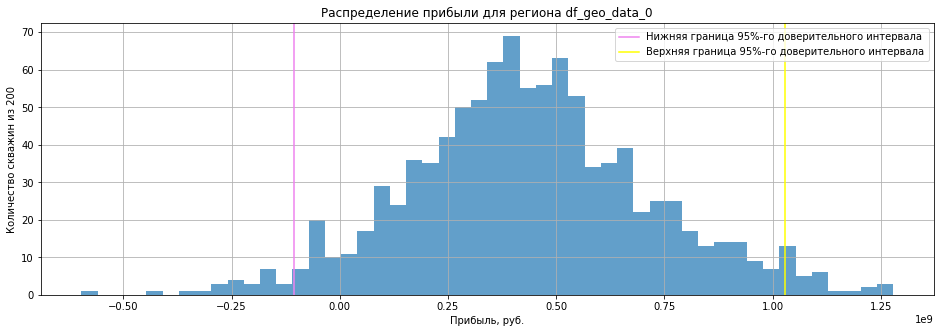

Для региона df_geo_data_0:
Средняя валовая прибыль с 200 лучших скважин, отобранных по предсказанию = 44 млн. рублей.
Доверительный интервал составляет от -11 до 103 млн. рублей.
Риск убытков составляет = 5.90%


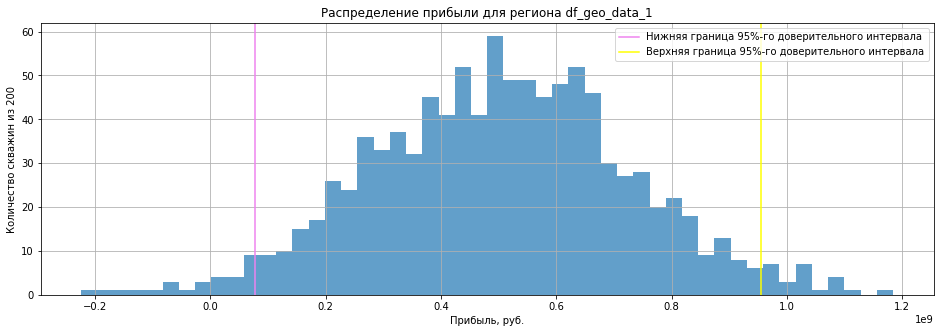

Для региона df_geo_data_1:
Средняя валовая прибыль с 200 лучших скважин, отобранных по предсказанию = 50 млн. рублей.
Доверительный интервал составляет от 8 до 95 млн. рублей.
Риск убытков составляет = 1.20%


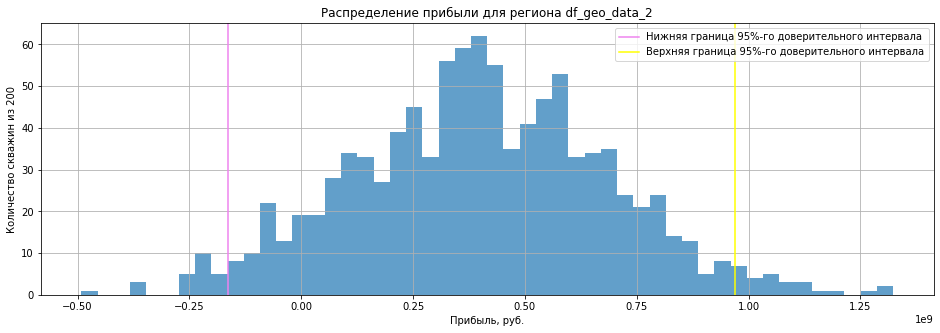

Для региона df_geo_data_2:
Средняя валовая прибыль с 200 лучших скважин, отобранных по предсказанию = 40 млн. рублей.
Доверительный интервал составляет от -16 до 97 млн. рублей.
Риск убытков составляет = 8.60%


In [21]:
for name in tqdm(names, desc='Обработка регионов'):
    values = []
    
    # 1000 выборок для оценки прибыли
    for _ in range(1000):
        # Случайное подвыборка целевых значений
        target_subsample = targets[name][0].sample(POINTS, replace=True, random_state=np.random.RandomState())
        
        # вероятности для подвыборки
        probs_subsample = targets[name][1][target_subsample.index]

        values.append(profit(target_subsample, probs_subsample, BEST_POINTS))

    values = pd.Series(values)
    
    # Вычисляем среднюю прибыль и доверительные интервалы
    mean = values.mean() / 10000000
    lower = values.quantile(0.025) / 10000000
    upper = values.quantile(0.975) / 10000000
    
    # расчет риска убытков
    #risk = values.apply(lambda x: x < 0).sum() / len(values)
    risk = (values < 0).mean()
    
    # визуализация распределения прибыли
    plt.figure(figsize=(16, 5))
    values.hist(bins=50, alpha=0.7)
    plt.grid(True)
    plt.axvline(values.quantile(0.025), color='violet', label='Нижняя граница 95%-го доверительного интервала')
    plt.axvline(values.quantile(0.975), color='yellow', label='Верхняя граница 95%-го доверительного интервала')
    plt.legend()
    plt.xlabel('Прибыль, руб.')
    plt.ylabel('Количество скважин из 200')
    plt.title(f'Распределение прибыли для региона {name}')
    plt.show()

    print(f'Для региона {name}:')
    print(f'Средняя валовая прибыль с 200 лучших скважин, отобранных по предсказанию = {mean:.0f} млн. рублей.')
    print(f'Доверительный интервал составляет от {lower:.0f} до {upper:.0f} млн. рублей.')
    print(f'Риск убытков составляет = {risk:.2%}')

##### **Вывод**

Оптимальным выбором для разработки скважин является регион df_geo_data_1. Он предлагает наивысшую среднюю валовую прибыль (50 миллионов рублей) и одновременно наименьший риск убытков (1.10%). Хотя доверительный интервал также имеет значительное распределение, верхняя граница в 92 миллионов рублей может указать на хорошие возможности для доходности.

Выбор региона df_geo_data_1 сбалансирован с учетом потенциальной прибыли и приемлемого уровня риска, что делает его самым привлекательным вариантом для инвестиций в разработку скважин.


## Общий вывод

В ходе данного исследования было необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.

Работа состояла из нескольких этапов:
1. Загрузка и подготовка данных: 
- Во всех трех датафреймах по 10000 строк. Пропуски отсутствуют. Названия столбцов корректны
- В ходе предобработки данных в датафреймах удален столбец с id
- Распределение скважин в первом и третьем регионах стремится к нормальному, тогда как во втором регионе наблюдается аномальное распределение: значения варьируются от 0 до 5 баррелей с равномерными интервалами в 15-20 и составляют 100000 единиц данных. Также было обнаружено, что во втором регионе существует значительная корреляция между характеристикой f2 и объемом добычи.
2. Обучение моделей, выбор лучшей, проверка качества
- Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.89).  В то же время, для датасетов df_geo_data_0 и df_geo_data_2 RMSE значительно выше и составляет 37.76 и 40.15 соответственно. Эти показатели указывают на значительный разброс в целевых значениях, что означает, что предсказанные данные для этих наборов не в полной мере отражают реальные запасы сырья с высокой степенью точности. 
3. Подготовка к рассчету прибыли
- Для того чтобы вернуть вложенные средства в разработку, скважины, отобранные с помощью модели, должны обладать запасами, значительно превышающими установленную пороговую величину. Это обусловлено тем, что в текущих условиях доля скважин с запасами, превышающими этот порог, составляет всего лишь 40% во всех регионах. Средняя точка безубыточности составляет приблизительно 111.11 тысяч баррелей на скважину, в то время как средние запасы колеблются в пределах от 68 до 95 тысяч баррелей на регион. Более того, из общего числа 500 скважин лишь 200, или 40%, демонстрируют запасы, превышающие установленный порог.
4. Расчет прибыли и рисков
- Оптимальным выбором для разработки скважин является регион df_geo_data_1. Он предлагает наивысшую среднюю валовую прибыль (50 миллионов рублей) и одновременно наименьший риск убытков (1.10%). Хотя доверительный интервал также имеет значительное распределение, верхняя граница в 92 миллионов рублей может указать на хорошие возможности для доходности. Выбор региона df_geo_data_1 сбалансирован с учетом потенциальной прибыли и приемлемого уровня риска, что делает его самым привлекательным вариантом для инвестиций в разработку скважин.
